### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [3]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [4]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max))
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [5]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Box Filter

In [19]:
def box_filter(arr,row,col):
    '''perform box filter'''

    kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            result[i, j] = np.rint((1/9)*np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))

    return result

### Gaussian Filter

In [18]:
def gaussian_filter(arr,row,col):
    '''perform Gaussian or weighted average filter'''

    kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            result[i, j] = np.rint((1/16)*np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))

    return result

### Main Function


Enter 1 to apply box filter
Enter 2 to apply weighted average filter or gaussian filter
Enter your choice::  1


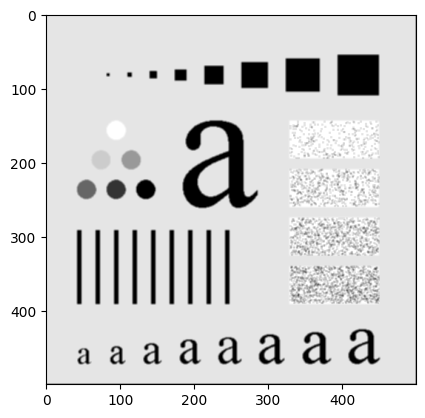

In [22]:
if __name__ == '__main__':
    
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0333(a)(test_pattern_blurring_orig).pgm")

    ch=int(input("\nEnter 1 to apply box filter\nEnter 2 to apply weighted average filter or gaussian filter\nEnter your choice:: "))

    if ch==1:
        result=box_filter(k1,row1,col1)
        Write_img(f"outputs\\boxfilter_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==2:
        result=gaussian_filter(k1,row1,col1)
        Write_img(f"outputs\\gaussian_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    else :
        print("\nInvalid choice!")

### Testing 

In [11]:
input_arr= arr=np.array([[1,8,8,0,7],[4,7,9,5,7],[5,4,6,8,6],[4,2,0,1,5],[0,1,0,2,0]])
row,col=input_arr.shape

In [20]:
# Box filter test

result= box_filter(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]
output
[[2 4 4 4 2]
 [3 6 6 6 4]
 [3 5 5 5 4]
 [2 2 3 3 2]
 [1 1 1 1 1]]


In [21]:
# Gaussian Filter Test
result= gaussian_filter(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]
output
[[2 5 5 4 3]
 [3 6 7 6 4]
 [3 5 5 6 4]
 [2 2 2 3 3]
 [1 1 1 1 1]]
